<img src="https://drive.google.com/uc?export=view&id=1wYSMgJtARFdvTt5g7E20mE4NmwUFUuog" width="200">

[![Build Fast with AI](https://img.shields.io/badge/BuildFastWithAI-GenAI%20Bootcamp-blue?style=for-the-badge&logo=artificial-intelligence)](https://www.buildfastwithai.com/genai-course)
[![EduChain GitHub](https://img.shields.io/github/stars/satvik314/educhain?style=for-the-badge&logo=github&color=gold)](https://github.com/satvik314/educhain)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1dwI5IitDgBbEaceVhyBRZcdIjXnRX4Lv#scrollTo=T1mvFCx6mYOK)
## Master Generative AI in 6 Weeks
**What You'll Learn:**
- Build with Latest LLMs
- Create Custom AI Apps
- Learn from Industry Experts
- Join Innovation Community
Transform your AI ideas into reality through hands-on projects and expert mentorship.
[Start Your Journey](https://www.buildfastwithai.com/genai-course)
*Empowering the Next Generation of AI Innovators

## **txtai: Semantic Search and LLM Workflows**

txtai is an all-in-one embeddings database for semantic search and LLM workflows, combining vector indexes, graph networks, and relational databases. It enables powerful knowledge search and large language model (LLM) applications.

Key Features:
- 🔎 Vector search with SQL, object storage, topic modeling, and multimodal indexing
- 📄 Create embeddings for text, documents, audio, images, and video
- 💡 LLM-powered pipelines for prompts, Q&A, labeling, transcription, translation, summarization, and more
- ↪️️ Workflow integration for microservices or multi-model processes
- 🤖 Autonomous agents connecting embeddings, pipelines, workflows, and more
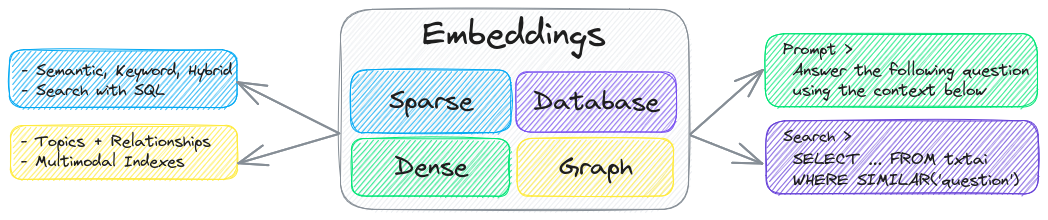
```

###**Setup and Installation**



In [ ]:
%%capture
!pip install git+https://github.com/neuml/txtai#egg=txtai[api,pipeline]
%%capture
!pip install git+https://github.com/neuml/txtai#egg=txtai[graph]

!wget -N https://github.com/neuml/txtai/releases/download/v3.5.0/tests.tar.gz
!tar -xvzf tests.tar.gz

#Restart Runtime


###**Create a Transcription instance**


In [ ]:

%%capture

from txtai.pipeline import Transcription

# Create transcription model
transcribe = Transcription()

##**Transcribe audio to text**

In [ ]:

from IPython.display import Audio, display

files = ["Beijing_mobilises.wav", "Canadas_last_fully.wav", "Maine_man_wins_1_mil.wav", "Make_huge_profits.wav", "The_National_Park.wav", "US_tops_5_million.wav"]
files = ["txtai/%s" % x for x in files]

for x, text in enumerate(transcribe(files)):
  display(Audio(files[x]))
  print(text)
  print()

Baging mobilizes invasion kraft along coast as tie one tensions escalates

Canodas last fully intact ice shelf has suddenly collapsed forming a manhattan sized iceberge

Main man wins from lottery ticket

Make huge profits without working make up to one hundred thousand dollars a day

National park service warns against sacrificing slower friends in a bare attack

Ues virus cases top a million



###**Create a Translation instance**

In [ ]:
%%capture

from txtai.pipeline import Translation

# Create translation model
translate = Translation()

In [ ]:
translation = translate("This is a test translation into Spanish", "es")
translation

'Esta es una traducción de prueba al español'

In [ ]:
translate(translation, "en")

'This is a test translation into Spanish'

###**Translating multiple languages in a single call**

In [ ]:
def run():
  languages = ["fr", "es", "de", "hi", "ja"]
  translations = [translate("The sky is blue, the stars are far", language) for language in languages]
  english = translate(translations, "en")

  for x, text in enumerate(translations):
    print("Original Language: %s" % languages[x])
    print("Translation: %s" % text)
    print("Back to English: %s" % english[x])
    print()


run()


Original Language: fr
Translation: Le ciel est bleu, les étoiles sont loin
Back to English: The sky is blue, the stars are far away

Original Language: es
Translation: El cielo es azul, las estrellas están lejos.
Back to English: The sky is blue, the stars are far away.

Original Language: de
Translation: Der Himmel ist blau, die Sterne sind weit
Back to English: The sky is blue, the stars are wide

Original Language: hi
Translation: आकाश नीला है, तारे दूर हैं
Back to English: Sky is blue, stars are away

Original Language: ja
Translation: 天は青い、星は遠い。
Back to English: The heavens are blue and the stars are far away.



###**Create an Embeddings and Extractor instances**

In [ ]:
%%capture

from txtai.embeddings import Embeddings
from txtai.pipeline import Extractor

# Create embeddings model, backed by sentence-transformers & transformers
embeddings = Embeddings({"path": "sentence-transformers/nli-mpnet-base-v2"})

# Create extractor instance
extractor = Extractor(embeddings, "distilbert-base-cased-distilled-squad")

In [ ]:
data = ["Giants hit 3 HRs to down Dodgers",
        "Giants 5 Dodgers 4 final",
        "Dodgers drop Game 2 against the Giants, 5-4",
        "Blue Jays beat Red Sox final score 2-1",
        "Red Sox lost to the Blue Jays, 2-1",
        "Blue Jays at Red Sox is over. Score: 2-1",
        "Phillies win over the Braves, 5-0",
        "Phillies 5 Braves 0 final",
        "Final: Braves lose to the Phillies in the series opener, 5-0",
        "Lightning goaltender pulled, lose to Flyers 4-1",
        "Flyers 4 Lightning 1 final",
        "Flyers win 4-1"]

questions = ["What team won the game?", "What was score?"]

execute = lambda query: extractor([(question, query, question, False) for question in questions], data)

for query in ["Red Sox - Blue Jays", "Phillies - Braves", "Dodgers - Giants", "Flyers - Lightning"]:
    print("----", query, "----")
    for answer in execute(query):
        print(answer)
    print()

# Ad-hoc questions
question = "What hockey team won?"

print("----", question, "----")
print(extractor([(question, question, question, False)], data))

---- Red Sox - Blue Jays ----
('What team won the game?', 'Blue Jays')
('What was score?', '2-1')

---- Phillies - Braves ----
('What team won the game?', 'Phillies')
('What was score?', '5-0')

---- Dodgers - Giants ----
('What team won the game?', 'Giants')
('What was score?', '5-4')

---- Flyers - Lightning ----
('What team won the game?', 'Flyers')
('What was score?', '4-1')

---- What hockey team won? ----
[('What hockey team won?', 'Flyers')]


###**Create a captions instance**


In [ ]:
!pip install ipyplot

In [ ]:

%%capture

from txtai.pipeline import Caption

# Create caption pipeline
caption = Caption()

In [ ]:

import glob
import ipyplot

from PIL import Image

images = glob.glob('txtai/*jpg')

captions = caption(images)

ipyplot.plot_images([Image.open(image) for image in images], captions, img_width=425, force_b64=True)

###**Summary**

In [ ]:
from txtai.pipeline import Summary

detailed_text = """
Artificial Intelligence (AI) is the simulation of human intelligence in machines that are programmed to think and act like humans. The term AI is often used to describe machines or computers that can perform tasks that typically require human intelligence, such as visual perception, speech recognition, decision-making, and language translation. AI systems can be categorized into narrow AI and general AI. Narrow AI refers to systems that are designed to perform a specific task, such as facial recognition or self-driving cars, while general AI refers to a more advanced form of AI that can perform any intellectual task that a human being can do.

The development of AI has been fueled by advancements in machine learning (ML), a subset of AI that involves the use of algorithms to analyze and learn from data. ML systems can identify patterns in data and use this information to make predictions or decisions without being explicitly programmed. Deep learning, a further subset of ML, involves the use of neural networks that mimic the structure of the human brain. These neural networks are capable of processing large amounts of data and solving complex problems in fields such as healthcare, finance, and transportation.

AI has the potential to revolutionize various industries, including healthcare, where it can help in diagnosing diseases, predicting patient outcomes, and discovering new drugs. In the finance sector, AI can be used for fraud detection, risk assessment, and algorithmic trading. Moreover, AI-powered automation can streamline processes in manufacturing, logistics, and customer service, improving efficiency and reducing costs. However, the rise of AI also raises concerns regarding job displacement, privacy, and ethical considerations, leading to debates on how AI should be regulated and its impact on society.
"""

summary = Summary()
summarized_text = summary(detailed_text)

print("Summarized Text:")
print(summarized_text)

Summarized Text:
Artificial Intelligence (AI) is the simulation of human intelligence in machines that are programmed to think and act like humans. The term AI is often used to describe machines or computers that can perform tasks that typically require human intelligence, such as visual perception, speech recognition, decision-making, and language translation. The rise of AI raises concerns regarding job displacement, privacy, and ethical considerations.
